<a href="https://colab.research.google.com/github/sheetalbangalore/ORF-Senior-Thesis-Spring-Interim-Report/blob/main/2030%20Metro%20Network%20Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json

## **Setting Up**

In [26]:
# START BY CREATING THE NEW GRAPH JUST LIKE WE DID IN PART_1 NOTEBOOK
# THEN RUN THE SIMULATIONS

df_2030 = pd.read_csv('2030_Stations.csv')
df_2030["Station"] = df_2030["Station"].str.replace(" ", "_")

display(df_2030)

,ID,Station,Traffic,First Line,Second Line,Third Line,Fourth Line,Fifth Line
0,1,GARE_DU_NORD,NaN,4,5,NaN,NaN,NaN
1,2,SAINT-LAZARE,NaN,3,9,12,13.0,14.0
2,3,GARE_DE_LYON,NaN,1,14,A,NaN,NaN
3,4,MONTPARNASSE-BIENVENUE,NaN,4,6,12,13.0,NaN
4,5,GARE_DE_L'EST,NaN,4,5,7,NaN,NaN
...,...,...,...,...,...,...,...,...
365,366,PALAISEAU,NaN,18,NaN,NaN,NaN,NaN
366,367,MASSY-PALAISEAU,NaN,18,NaN,NaN,NaN,NaN
367,368,MASSY_OPERA,NaN,18,NaN,NaN,NaN,NaN
368,369,ANTONYPOLE,NaN,18,NaN,NaN,NaN,NaN


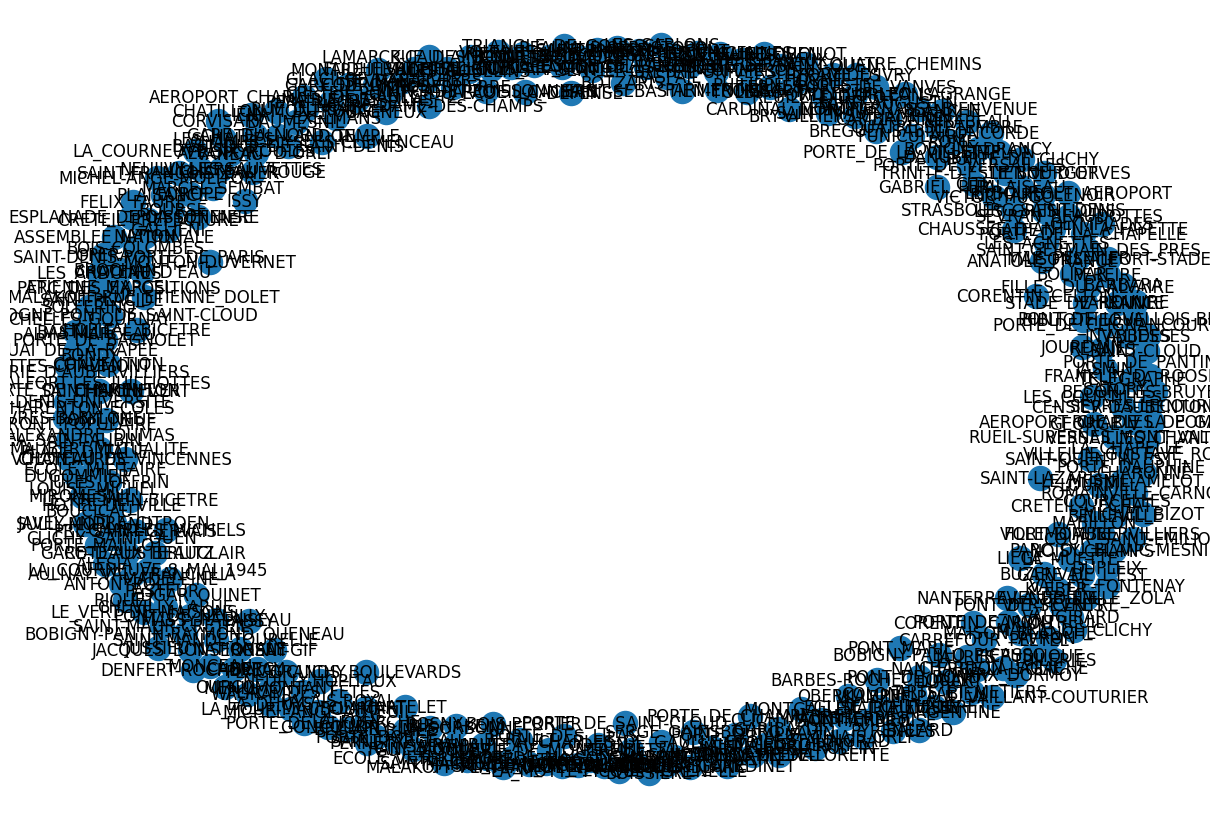

In [27]:
# Create a graph object
graph1 = nx.Graph()
for index, row in df_2030.iterrows():
    graph1.add_node(row['Station'], weight=0)

# Create a dictionary where keys are station names and values are (latitude, longitude) tuples
pos_geo = {}
# for index, row in df_2030.iterrows():
    # pos_geo[row['Station']] = (row['longitude'], row['latitude'])

plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Extract longitude and latitude values from df1 to lists
# longitude = df_2030['longitude'].tolist()
# latitude = df_2030['latitude'].tolist()

# plt.xlim([min(longitude) - 0.01, max(longitude) + 0.02])
# plt.ylim([min(latitude) - 0.01 , max(latitude) + 0.01])

# Array of colors
node_colors = ['blue'] * len(graph1.nodes())  # Initialize all to blue

# Draw the graph with the updated node colors:
nx.draw(graph1, with_labels=True)
plt.show()  # Display the visualization

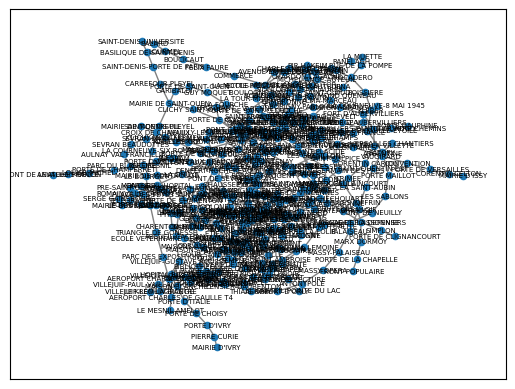

370

In [28]:
# Last Edit: 1/20/25
# KEEP MODIFYING: ADD ALL LINES
# GOAL: RECREATE THE METRO SYSTEM AS OF 2021 (MUST ALIGN WITH THE TRAFFIC DATA FROM RATP)
# ISSUES: I COULDN'T FIGURE OUT HOW TO PROPERLY ADD LINES THAT WERE COMPLICATED
       # (bottom part of line7 wasn't added (fixed on 2/18/25), bottom part of line10 wasn't added (fixed on 2/21/25), bottom part of line13 wasn't added (fixed on 2/21/25))

# Create a graph object
graph_all_lines = nx.Graph()

Line1_Stations_Ordered = ["LA DEFENSE", "ESPLANADE DE LA DEFENSE", "PONT DE NEUILLY", "LES SABLONS", "PORTE MAILLOT",
"ARGENTINE", "CHARLES DE GAULLE-ETOILE", "GEORGE V", "FRANKLIN D. ROOSEVELT", "CHAMPS-ELYSEES-CLEMENCEAU",
"CONCORDE", "TUILERIES", "PALAIS-ROYAL", "LOUVRE", "CHATELET", "HOTEL DE VILLE", "SAINT-PAUL", "BASTILLE",
"GARE DE LYON", "REUILLY-DIDEROT", "NATION", "PORTE DE VINCENNES", "SAINT-MANDE-TOURELLE",
"BERAULT", "CHATEAU DE VINCENNES", "VAL DE-FONTENAY"]

Line2_Stations_Ordered = ["PORTE DAUPHINE", "VICTOR HUGO", "CHARLES DE GAULLE-ETOILE", "TERNES", "COURCELLES",
"MONCEAU", "VILLIERS", "ROME", "PLACE CLICHY", "BLANCHE", "PIGALLE", "ANVERS", "BARBES-ROCHECHOUART",
"LA CHAPELLE", "STALINGRAD", "JAURES", "COLONEL FABIEN", "BELLEVILLE", "COURONNES", "MENILMONTANT",
"PERE LACHAISE", "PHILIPPE AUGUSTE", "ALEXANDRE DUMAS", "AVRON", "NATION"]

Line3_Stations_Ordered = ["PONT DE LEVALLOIS-BECON", "ANATOLE FRANCE", "LOUISE MICHEL", "PORTE DE CHAMPERRET",
"PEREIRE", "WAGRAM", "MALESHERBES", "VILLIERS", "EUROPE", "SAINT-LAZARE", "HAVRE-CAUMARTIN", "OPERA",
"QUATRE-SEPTEMBRE", "BOURSE", "SENTIER", "REAUMUR-SEBASTOPOL", "ARTS ET METIERS", "TEMPLE", "REPUBLIQUE",
"PARMENTIER", "SAINT-MAUR", "PERE LACHAISE", "GAMBETTA", "PORTE DE BAGNOLET", "GALLIENI"]

Line3bis_Stations_Ordered = ["PORTE DES LILAS", "SAINT-FARGEAU", "PELLEPORT", "GAMBETTA"]

Line4_Stations_Ordered = ["PORTE DE CLIGNANCOURT", "SIMPLON", "MARCADET-POISSONNIERS", "CHATEAU ROUGE",
"BARBES-ROCHECHOUART", "GARE DU NORD", "GARE DE L'EST", "CHATEAU D'EAU", "STRASBOURG-SAINT-DENIS",
"REAUMUR-SEBASTOPOL", "ETIENNE MARCEL", "LES HALLES", "CHATELET", "CITE", "SAINT-MICHEL", "ODEON",
"SAINT-GERMAIN DES PRES", "SAINT-SULPICE", "SAINT-PLACIDE", "MONTPARNASSE-BIENVENUE", "VAVIN", "RASPAIL",
"DENFERT-ROCHEREAU", "MOUTON-DUVERNET", "ALESIA", "PORTE D'ORLEANS", "MAIRIE DE MONTROUGE", "BARBARA", "BAGNEUX"]

Line5_Stations_Ordered = ["BOBIGNY-PABLO PICASSO", "BOBIGNY-PANTIN-RAYMOND QUENEAU", "EGLISE DE PANTIN", "HOCHE",
"PORTE DE PANTIN", "OURCQ", "LAUMIERE", "JAURES", "STALINGRAD", "GARE DU NORD", "GARE DE L'EST", "JACQUES BONSERGENT",
"REPUBLIQUE", "OBERKAMPF", "RICHARD LENOIR", "BREGUET-SABIN", "BASTILLE", "QUAI DE LA RAPEE", "GARE D'AUSTERLITZ",
"SAINT-MARCEL", "CAMPO-FORMIO", "PLACE D'ITALIE"]

Line6_Stations_Ordered = ["CHARLES DE GAULLE-ETOILE", "KLEBER", "BOISSIERE", "TROCADERO", "PASSY", "BIR-HAKEIM",
"DUPLEIX", "LA MOTTE-PICQUET-GRENELLE", "CAMBRONNE", "SEVRES-LECOURBE", "PASTEUR", "MONTPARNASSE-BIENVENUE",
"EDGAR QUINET", "RASPAIL", "DENFERT-ROCHEREAU", "SAINT-JACQUES", "GLACIERE", "CORVISART", "PLACE D'ITALIE",
"NATIONALE", "CHEVALERET", "QUAI DE LA GARE", "BERCY", "DUGOMMIER", "DAUMESNIL", "BEL AIR", "PICPUS", "NATION"]

Line7_Stations_Ordered = ["LA COURNEUVE-8 MAI 1945", "FORT D'AUBERVILLIERS", "AUBERVILLIERS-PANTIN-QUATRE CHEMINS",
"PORTE DE LA VILLETTE", "CORENTIN CARIOU", "CRIMEE", "RIQUET", "STALINGRAD", "LOUIS BLANC", "CHATEAU-LANDON",
"GARE DE L'EST", "POISSONNIERE", "CADET", "LE PELETIER", "CHAUSSEE D'ANTIN-LA FAYETTE", "OPERA", "PYRAMIDES",
"PALAIS-ROYAL", "PONT NEUF", "CHATELET", "PONT MARIE", "SULLY-MORLAND", "JUSSIEU", "PLACE MONGE",
"CENSIER-DAUBENTON", "LES GOBELINS", "PLACE D'ITALIE", "TOLBIAC", "MAISON BLANCHE", "PORTE D'ITALIE", "PORTE DE CHOISY",
"PORTE D'IVRY", "PIERRE CURIE", "MAIRIE D'IVRY"]

Line7_Extra_Stations_Ordered = ["LE KREMLIN-BICETRE", "VILLEJUIF-LEO LAGRANGE", "VILLEJUIF-PAUL VAILLANT-COUTURIER", "VILLEJUIF-LOUIS ARAGON"]

Line7bis_Stations_Ordered = ["LOUIS BLANC", "JAURES", "BOLIVAR", "BUTTES-CHAUMONT", "BOTZARIS", "PLACE DES FETES",
"PRE-SAINT-GERVAIS", "DANUBE", "BOTZARIS"]

Line8_Stations_Ordered = ["BALARD", "LOURMEL", "BOUCICAUT", "FELIX FAURE", "COMMERCE", "LA MOTTE-PICQUET-GRENELLE",
"ECOLE MILITAIRE", "LA TOUR-MAUBOURG", "INVALIDES", "CONCORDE", "MADELEINE", "OPERA", "RICHELIEU-DROUOT",
"GRANDS BOULEVARDS", "BONNE NOUVELLE", "STRASBOURG-SAINT-DENIS", "REPUBLIQUE", "FILLES DU CALVAIRE",
"SAINT-SEBASTIEN-FROISSART", "CHEMIN VERT", "BASTILLE", "LEDRU-ROLLIN", "FAIDHERBE-CHALIGNY", "REUILLY-DIDEROT",
"MONTGALLET", "DAUMESNIL", "MICHEL BIZOT", "PORTE DOREE", "PORTE DE CHARENTON", "LIBERTE", "CHARENTON-ECOLES",
"ECOLE VETERINAIRE DE MAISONS-ALFORT", "MAISONS-ALFORT-STADE", "MAISONS-ALFORT-LES JUILLIOTTES",
"CRETEIL-L'ECHAT", "CRETEIL-UNIVERSITE", "CRETEIL-PREFECTURE", "CRETEIL-POINTE DU LAC"]

Line9_Stations_Ordered = ["PONT DE SEVRES", "BILLANCOURT", "MARCEL SEMBAT", "PORTE DE SAINT-CLOUD", "EXELMANS",
"MICHEL-ANGE-MOLITOR", "MICHEL-ANGE-AUTEUIL", "JASMIN", "RANELAGH", "LA MUETTE", "RUE DE LA POMPE", "TROCADERO",
"IENA", "ALMA-MARCEAU", "FRANKLIN D. ROOSEVELT", "SAINT-PHILIPPE-DU-ROULE", "MIROMESNIL", "SAINT-AUGUSTIN",
"HAVRE-CAUMARTIN", "CHAUSSEE D'ANTIN-LA FAYETTE", "RICHELIEU-DROUOT", "GRANDS BOULEVARDS", "BONNE NOUVELLE",
"STRASBOURG-SAINT-DENIS", "REPUBLIQUE", "OBERKAMPF", "SAINT-AMBROISE", "VOLTAIRE", "CHARONNE",
"RUE DES BOULETS", "NATION", "BUZENVAL", "MARAICHERS", "PORTE DE MONTREUIL", "ROBESPIERRE", "CROIX DE CHAVAUX",
"MAIRIE DE MONTREUIL"]

Line10_Stations_Ordered = ["BOULOGNE-PONT DE SAINT-CLOUD", "BOULOGNE-JEAN JAURES", "PORTE D'AUTEUIL", "MICHEL-ANGE-AUTEUIL",
"EGLISE D'AUTEUIL", "JAVEL-ANDRE CITROEN", "CHARLES MICHELS", "AVENUE EMILE ZOLA", "LA MOTTE-PICQUET-GRENELLE", "SEGUR",
"DUROC", "VANEAU", "SEVRES-BABYLONE", "MABILLON", "ODEON", "CLUNY LA SORBONNE", "MAUBERT-MUTUALITE", "CARDINAL LEMOINE", "JUSSIEU", "GARE D'AUSTERLITZ"]

Line10_Extra_Stations_Ordered = ["MICHEL-ANGE-MOLITOR", "CHARDON-LAGACHE", "MIRABEAU"]

Line11_Stations_Ordered = ["CHATELET", "HOTEL DE VILLE", "RAMBUTEAU", "ARTS ET METIERS", "REPUBLIQUE", "GONCOURT",
"BELLEVILLE", "PYRENEES", "JOURDAIN", "PLACE DES FETES", "TELEGRAPHE", "PORTE DES LILAS", "MAIRIE DES LILAS", "SERGE GAINSBOURG",
"ROMAINVILLE-CARNOT", "MONTREUIL-HOPITAL", "LA DHUYS", "COTEAUX BEAUCLAIR", "ROSNY-BOIS-PERRIER", "VILLEMOMBLE",
"NEUILLY-LES FAUVETTES", "NEUILLY-HOPITAUX", "NOISY-CHAMPS"]

Line12_Stations_Ordered = ["FRONT POPULAIRE", "PORTE DE LA CHAPELLE", "MARX DORMOY", "MARCADET-POISSONNIERS",
"JULES JOFFRIN", "LAMARCK-CAULAINCOURT", "ABBESSES", "PIGALLE", "SAINT-GEORGES", "NOTRE-DAME-DE-LORETTE", "TRINITE-D'ESTIENNE D'ORVES",
"SAINT-LAZARE", "MADELEINE", "CONCORDE", "ASSEMBLEE NATIONALE", "SOLFERINO", "RUE DU BAC", "SEVRES-BABYLONE",
"RENNES", "NOTRE-DAME-DES-CHAMPS", "MONTPARNASSE-BIENVENUE", "FALGUIERE", "PASTEUR", "VOLONTAIRES", "VAUGIRARD",
"CONVENTION", "PORTE DE VERSAILLES", "CORENTIN CELTON", "MAIRIE D'ISSY"]

Line13_Stations_Ordered = ["SAINT-DENIS-UNIVERSITE", "BASILIQUE DE SAINT-DENIS", "SAINT-DENIS-PORTE DE PARIS", "CARREFOUR PLEYEL",
"MAIRIE DE SAINT-OUEN", "GARIBALDI", "PORTE DE SAINT-OUEN", "GUY MOQUET", "LA FOURCHE", "PLACE CLICHY", "LIEGE", "SAINT-LAZARE",
"MIROMESNIL", "CHAMPS-ELYSEES-CLEMENCEAU", "INVALIDES", "VARENNE", "SAINT-FRANCOIS-XAVIER", "DUROC", "MONTPARNASSE-BIENVENUE",
"GAITE", "PERNETY", "PLAISANCE", "PORTE DE VANVES", "MALAKOFF-PLATEAU DE VANVES", "MALAKOFF-RUE ETIENNE DOLET", "CHATILLON-MONTROUGE"]

Line13_Extra_Stations_Ordered = ["LES COURTILLES", "LES AGNETTES", "GABRIEL PERI", "MAIRIE DE CLICHY", "PORTE DE CLICHY", "BROCHANT"]

Line14_Stations_Ordered = ["SAINT-DENIS-PLEYEL", "MAIRIE DE SAINT-OUEN", "CLICHY SAINT-OUEN", "PORTE DE CLICHY", "PONT CARDINET", "SAINT-LAZARE",
"MADELEINE", "PYRAMIDES", "CHATELET", "GARE DE LYON", "BERCY", "COUR SAINT-EMILION", "BIBLIOTHEQUE", "OLYMPIADES", "MAISON BLANCHE", "HOPITAL BICETRE",
"VILLEJUIF-GUSTAVE ROUSSY", "L'HAY-LES-ROSES", "CHEVILLY-LARUE", "THIAIS-ORLY", "AEROPORT D'ORLY"]

Line15_Stations_Ordered = ["NOISY-CHAMPS", "BRY-VILLIERS-CHAMPIGNY", "CHAMPIGNY-CENTRE", "SAINT-MAUR-CRETEIL", "CRETEIL-L'ECHAT",
"LE VERT DE MAISONS", "LES ARDOINES", "VITRY-CENTRE", "VILLEJUIF-LOUIS ARAGON", "VILLEJUIF-GUSTAVE ROUSSY", "ARCUEIL-CACHAN", "BAGNEUX",
"CHATILLON-MONTROUGE", "CLAMART", "ISSY", "PONT DE SEVRES", "SAINT-CLOUD", "RUEIL-SURESNES MONT VALERIEN", "NANTERRE-LA BOULE", "NANTERRE-LA FOLIE",
"LA DEFENSE", "BECON-LES-BRUYERES", "BOIS-COLOMBES", "LES AGNETTES", "LES GRESILLONS", "SAINT-DENIS PLEYEL", "STADE DE FRANCE",
"MAIRIE D'AUBERVILLIERS", "FORT D'AUBERVILLIERS", "BOBIGNY-DRANCY", "BOBIGNY-PABLO PICASSO", "PONT DE BONDY", "BONDY", "ROSNY-BOIS-PERRIER",
"VAL DE-FONTENAY", "LE PERREUX-NOGENT"]

Line16_Stations_Ordered = ["NOISY-CHAMPS", "CHELLES-GOURNAY", "CLICHY-MONTFERMEIL", "SEVRAN-LIVRY", "SEVRAN BEAUDOTTES", "AULNAY VAL FRANCILLIA",
"PARC DU BLANC-MESNIL", "LE BOURGET", "LA COURNEUVE-SIX ROUTES", "SAINT-DENIS-PLEYEL"]

Line17_Stations_Ordered = ["LE MESNIL-AMELOT", "AEROPORT CHARLES DE GAULLE T4", "AEROPORT CHARLES DE GAULLE T2", "PARC DES EXPOSITIONS",
"TRIANGLE DE GONESSE", "LE BOURGET AEROPORT", "LE BOURGET", "LA COURNEUVE-SIX ROUTES", "SAINT-DENIS-PLEYEL" ]

Line18_Stations_Ordered = ["VERSAILLES CHANTIERS", "SATORY", "SAINT-QUENTIN EST", "CEA SAINT-AUBIN", "ORSAY-GIF", "PALAISEAU","MASSY-PALAISEAU",
"MASSY OPERA", "ANTONYPOLE", "AEROPORT D'ORLY"]

for line in {1, 2, 3, 3.5, 4, 5, 6, 7, 7.5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}:
  for index, row in df_2030.iterrows():
    # Check if the station belongs to the current line
    if row['First Line'] == line  or row['Second Line'] == line or row['Third Line'] == line or row['Fourth Line'] == line or row['Fifth Line'] == line:
        # Add the station as a node to the graph
        graph_all_lines.add_node(row['Station'], weight=row['Traffic'])

for line in {1, 2, 3, 3.5, 4, 5, 6, 7, 7.5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}:
    # Determine which station ordering to use
    if line == 1:
      station_ordering = Line1_Stations_Ordered
    elif line == 2:
      station_ordering = Line2_Stations_Ordered
    elif line == 3:
      station_ordering = Line3_Stations_Ordered
    elif line == 3.5:
      station_ordering = Line3bis_Stations_Ordered
    elif line == 4:
      station_ordering = Line4_Stations_Ordered
    elif line == 5:
      station_ordering = Line5_Stations_Ordered
    elif line == 6:
      station_ordering = Line6_Stations_Ordered
    elif line == 7:
      station_ordering = Line7_Stations_Ordered
    elif line == 7.5:
      station_ordering = Line7bis_Stations_Ordered
    elif line == 8:
      station_ordering = Line8_Stations_Ordered
    elif line == 9:
      station_ordering = Line9_Stations_Ordered
    elif line == 10:
      station_ordering = Line10_Stations_Ordered
    elif line == 11:
      station_ordering = Line11_Stations_Ordered
    elif line == 12:
      station_ordering = Line12_Stations_Ordered
    elif line == 13:
      station_ordering = Line13_Stations_Ordered
    elif line == 14:
      station_ordering = Line14_Stations_Ordered
    elif line == 15:
      station_ordering = Line15_Stations_Ordered
    elif line == 16:
      station_ordering = Line16_Stations_Ordered
    elif line == 17:
      station_ordering = Line17_Stations_Ordered
    else:
      station_ordering = Line18_Stations_Ordered

    # Add edges for the current line
    for i in range(len(station_ordering) - 1):
      # Get the current and next station in the order
      station1 = station_ordering[i]
      station2 = station_ordering[i + 1]
      # Add an edge between the two stations
      graph_all_lines.add_edge(station1, station2, label=line)

# add additional nodes and edges related to line 7
for i, node in enumerate(Line7_Extra_Stations_Ordered):
  graph_all_lines.add_node(node)
  if i >= 1:
    graph_all_lines.add_edge(Line7_Extra_Stations_Ordered[i-1], node, label=7)
graph_all_lines.add_edge("MAISON BLANCHE", "LE KREMLIN-BICETRE", label=7)

# add additional nodes and edges related to line 10
for i, node in enumerate(Line10_Extra_Stations_Ordered):
  graph_all_lines.add_node(node)
  if i >= 1:
    graph_all_lines.add_edge(Line10_Extra_Stations_Ordered[i-1], node, label=10)
graph_all_lines.add_edge("BOULOGNE-JEAN JAURES", "MICHEL-ANGE-MOLITOR", label=10)
graph_all_lines.add_edge("MIRABEAU", "JAVEL-ANDRE CITROEN", label=10)

# add additional nodes and edges related to line 13
for i, node in enumerate(Line13_Extra_Stations_Ordered):
  graph_all_lines.add_node(node)
  if i >= 1:
    graph_all_lines.add_edge(Line13_Extra_Stations_Ordered[i-1], node, label=13)
graph_all_lines.add_edge("BROCHANT", "LA FOURCHE", label=13)

# add an additional edge related to line 15
graph_all_lines.add_edge("LE PERREUX-NOGENT", "CHAMPIGNY-CENTRE", label=15)

# Create a dictionary of labels for the nodes where the keys are node names
# and values are the labels you want displayed (e.g., 'Name of the Station').
labels = {node: node for node in graph_all_lines.nodes()}

# Define node positions (you can customize this)
pos = nx.spring_layout(graph_all_lines)

# Create a dictionary of weights for the nodes where the keys are the station names and the values are the traffic amounts
weight_dict = df_2030.set_index('Station')['Traffic'].to_dict()

# Now you can draw the nodes and edges
# node_sizes = [graph_all_lines.nodes[node].get('weight', 1) * 0.001 for node in graph_all_lines.nodes]
nx.draw_networkx_nodes(graph_all_lines, pos, node_size = 20) # Use the updated node_sizes list
nx.draw_networkx_edges(graph_all_lines, pos, edge_color='gray')
nx.draw_networkx_labels(graph_all_lines,pos, labels, font_size=5) # draw labels separately

plt.show()  # Display the visualization
graph_all_lines.number_of_nodes()

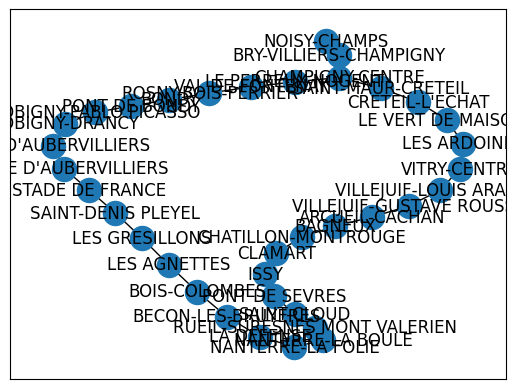

In [29]:
# Testing out a particular line
line_15_graph = nx.Graph()
line_15_edges = [e for e in graph_all_lines.edges() if graph_all_lines.get_edge_data(e[0], e[1])['label'] == 15]
line_15_graph.add_edges_from(line_15_edges)

nx.draw_networkx(line_15_graph)
plt.show()

In [30]:
# Fix the format of each station

name_mapping = {}

for node in graph_all_lines.nodes():
  name_mapping[node] = node.replace(" ", "_")

nx.relabel_nodes(graph_all_lines, name_mapping, copy=False)

# Download the graph

nx.write_edgelist(graph_all_lines, "2030_graph_all_lines.txt")

## **Read in the graph and the data frame**

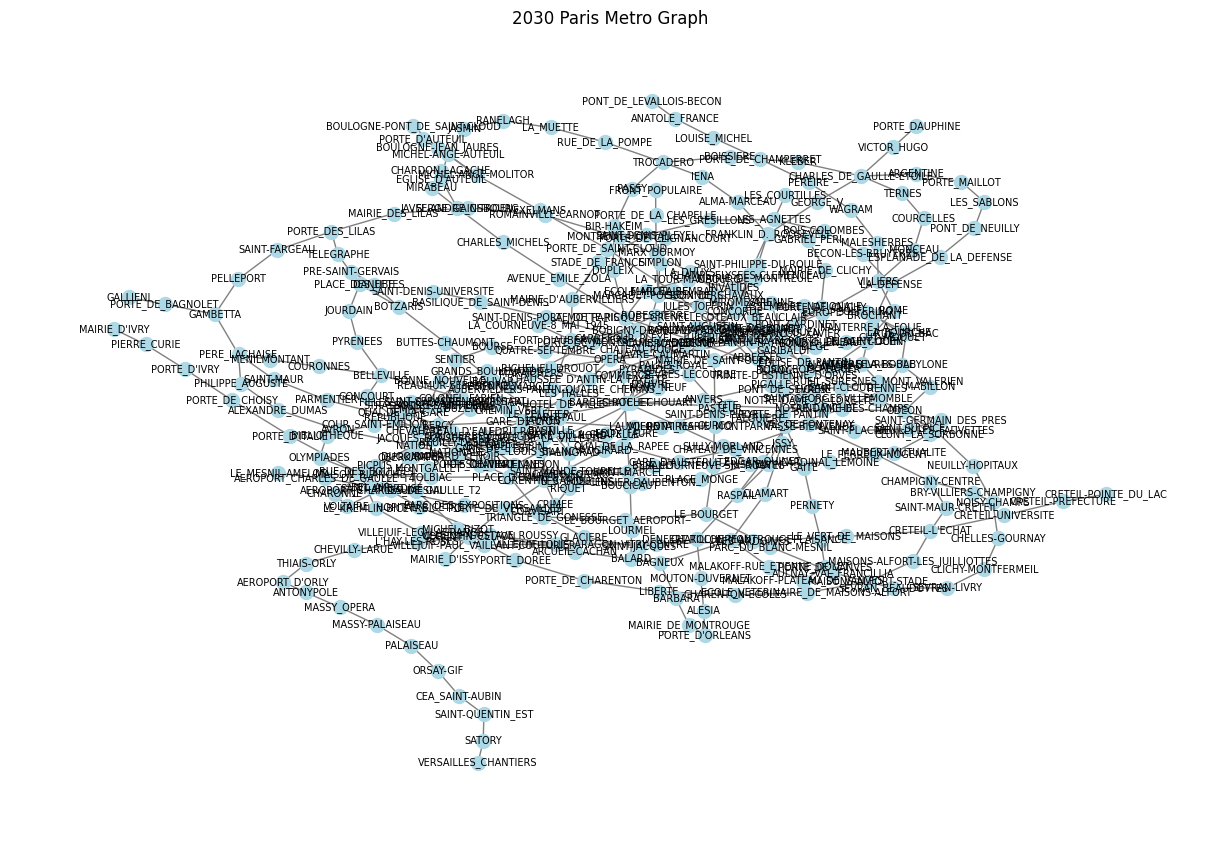

In [31]:
# Initialize an empty graph
G = nx.Graph()

# Read the graph file manually and parse edges
with open("2030_graph_all_lines.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ", 2)  # Split into first two parts + label dictionary
        if len(parts) == 3:
            node1, node2, attr_str = parts
            try:
                # Convert the attribute string into a dictionary
                attr_dict = eval(attr_str)  # Be cautious with eval() if the file is untrusted
                G.add_edge(node1, node2, **attr_dict)
            except SyntaxError:
                print(f"Skipping invalid line: {line.strip()}")

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=100, font_size=7)
plt.title("2030 Paris Metro Graph")
plt.show()

## **The Simulation**

In [33]:
# FIGURE OUT WHAT TO DO ABOUT THE POSITION

# Create a dictionary where keys are station names and values are (latitude, longitude) tuples

station_coordinates = {}
for index, row in df_2030.iterrows():
    station_coordinates[row['Station']] = (row['longitude'], row['latitude'])

plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Extract longitude and latitude values from df1 to lists
longitude = df_2030['longitude'].tolist()
latitude = df_2030['latitude'].tolist()

plt.xlim([min(longitude) - 0.01, max(longitude) + 0.02])
plt.ylim([min(latitude) - 0.01 , max(latitude) + 0.01])
nx.draw(G, station_coordinates)
plt.show()  # Display the visualization

print("# of stations:", G.number_of_nodes())

KeyError: 'longitude'

In [ ]:
# FIGURE OUT WHAT TO DO ABOUT THE TRAFFIC/LAMBDA

def update_node_with_lambda(G, lambda_dictionary):
  for node in G.nodes():
    G.nodes[node]["lambda"] = lambda_dictionary[node]
  return G

def inputs():
    # Assign probability distributions and lambda values to each node
    for station in G.nodes():
        random_probs = {} # EVENTUALLY UPDATE THIS BECAUSE IT'S NOT REALISTIC
        for node in G.nodes():
            if node != station:
                random_probs[node] = np.random.rand()
            else :
                random_probs[node] = 0
        total = sum(random_probs.values())
        normalized_probs = {k: v / total for k, v in random_probs.items()}  # Normalize to sum to 1
        lambda_value = np.random.uniform(2, 10) # This line doesn't matter because these lambda values get overwritten
        G.nodes[station]["prob"] = normalized_probs
        G.nodes[station]["lambda"] = lambda_value
    return G

def simulate_arrivals(G, days):
    """Generates passenger arrivals at each station using a Poisson distribution."""
    arrivals = {}
    for station in G.nodes():
        _, lambda_value = G.nodes[station]["data"]
        arrivals[station] = np.random.poisson(lam=lambda_value, size=days)
    return arrivals

def simulate_passenger_journeys(G, daily_arrivals):
    journeys = []

    for station, arrivals in daily_arrivals.items():
        total_passengers = sum(arrivals)  # Total passengers arriving in the day

        for _ in range(total_passengers):
            destination = np.random.choice(stations)  # Random destination
            while destination == station:
                destination = np.random.choice([s for s in stations if s != station])

            path_nodes = nx.shortest_path(G, source=station, target=destination)
            path_edges = [(path_nodes[i], path_nodes[i + 1]) for i in range(len(path_nodes) - 1)]
            path_line_number = nx.get_edge_attributes(G, "label")
            path_length = nx.get_edge_attributes(G, "length")
            journeys.append(path_nodes)

    return journeys

def calculate_avg_transfers(G, results):
    """Calculates the average number of transfers that someone who starts at each station would have to make to get to their final destination."""

    station_transfers = {}  # Store total transfers for each starting station
    station_counts = {}    # Store the number of journeys starting from each station

    for person_id, journey in enumerate(results):
        start_station = journey[0]  # Get the starting station for this journey

        # If this is the first journey from this station, initialize counts
        station_transfers.setdefault(start_station, 0)
        station_counts.setdefault(start_station, 0)

        # Count the transfers for this journey (same logic as before)
        transfers = 0
        if len(journey) > 2:
            for i in range(len(journey) - 2):
                current_edge = (journey[i], journey[i + 1])
                next_edge = (journey[i + 1], journey[i + 2])
                if G.get_edge_data(*current_edge).get("label") != G.get_edge_data(*next_edge).get("label"):
                    transfers += 1

        station_transfers[start_station] += transfers  # Add transfers for this journey
        station_counts[start_station] += 1           # Increment journey count for this station

    # Calculate averages
    avg_transfers = {}
    for station in station_transfers:
        avg_transfers[station] = station_transfers[station] / station_counts[station]

    return avg_transfers

lambda_dictionary = dict(zip(df_2030['Station'], df_2030['Traffic'] / 365))
G = inputs()
stations = list(G.nodes())
daily_arrivals = simulate_arrivals(G, 1)
G = update_node_with_lambda(G, lambda_dictionary)
results = simulate_passenger_journeys(G, daily_arrivals) # Run the simulation

print(results)

# Create a list to store the data for the DataFrame
data_results = []
for i, journey in enumerate(results):
    data_results.append({'person_id': i + 1, 'path': journey})  # Store the entire path

# Create a DataFrame from the data
df_results = pd.DataFrame(data_results)

# Print the DataFrame
display(df_results)

# Calculate and print the average transfers
avg_transfers_result = calculate_avg_transfers(G, results)
print("The average # transfers a person who starts at each station needs to make to get to their destination")
print(avg_transfers_result)

In [ ]:
# HANDLE ONCE ABOVE ARE FIXED

def find_changing_stations(G, results):
    changing_stations_per_person = {}  # Dictionary to store changing stations for each person

    for person_id, journey in enumerate(results):
        changing_stations = []

        if len(journey) > 2:  # Only check for changes if the journey involves more than 2 stations
          for i in range(len(journey) - 2):
              current_edge = (journey[i], journey[i + 1])
              next_edge = (journey[i + 1], journey[i + 2])

              current_line = G.get_edge_data(*current_edge).get("label")  # Get the line of the current edge
              next_line = G.get_edge_data(*next_edge).get("label")  # Get the line of the next edge

              if current_line != next_line:  # If lines are different, it's a changing station
                  changing_stations.append(journey[i + 1])

        changing_stations_per_person[person_id + 1] = changing_stations  # Store for this person

    return changing_stations_per_person

def calculate_transfers_per_station(changing_stations_result):
    transfer_counts = {}  # Initialize an empty dictionary to store transfer counts for each station

    for person_transfers in changing_stations_result.values():  # Iterate through transfer stations for each person
        for station in person_transfers:  # Iterate through transfer stations for this person
            transfer_counts[station] = transfer_counts.get(station, 0) + 1  # Increment transfer count for this station

    return transfer_counts

changing_stations_result = find_changing_stations(G, results)
print(changing_stations_result)
transfer_counts_result = calculate_transfers_per_station(changing_stations_result)

# Print and download the data from transfer_counts_result
print("Number of transfers at each station:", transfer_counts_result)
transfer_counts_result_df = pd.DataFrame(list(transfer_counts_result.items()), columns=['Station', 'Transfer_Count'])
transfer_counts_result_df = transfer_counts_result_df.sort_values(by=['Transfer_Count'], ascending=False) # Sort by transfer count in descending order
transfer_counts_result_df.to_csv("transfer_counts_result.csv", index=False)

# Add the 'transfer_stations' column to the DataFrame
df_results['transfer_stations'] = df_results['person_id'].apply(lambda person_id: changing_stations_result.get(person_id, []))

# Display the updated DataFrame
display(df_results)

df_results.to_csv("df_results_2030.csv", index=False)

In [ ]:
# HANDLE ONCE ABOVE ARE FIXED

# Assume you have a dictionary 'station_coordinates' with station names as keys and (latitude, longitude) tuples as values

# Get transfer counts result values
transfer_counts_result_values = list(transfer_counts_result.values())

# Compute quartiles
q1, q2, q3 = np.percentile(transfer_counts_result_values, [25, 50, 75])

# Function to assign colors based on quartiles
def assign_color(value):
    if value <= q1:
        return "blue"
    elif value <= q2:
        return "green"
    elif value <= q3:
        return "orange"
    else:
        return "purple"

# Assign colors to each node
node_colors = [assign_color(transfer_counts_result.get(station, 0)) for station in G.nodes()]

# Get node sizes based on transfer_counts_result
node_sizes = [transfer_counts_result.get(station, 0) * 0.8 for station in G.nodes()]  # Scale size for better visualization

# Get node positions from station_coordinates
pos = {station: station_coordinates[station] for station in G.nodes()}

# Draw the graph with node sizes and positions
nx.draw(G, pos=pos, with_labels=False, node_size=node_sizes, node_color = node_colors)

# Create a legend
legend_patches = [
    mpatches.Patch(color="blue", label=f"≤ {q1:.2f} (Lowest 25%)"),
    mpatches.Patch(color="green", label=f"{q1:.2f} - {q2:.2f} (25-50%)"),
    mpatches.Patch(color="orange", label=f"{q2:.2f} - {q3:.2f} (50-75%)"),
    mpatches.Patch(color="purple", label=f"> {q3:.2f} (Top 25%)"),
]

plt.legend(handles=legend_patches, title="Transfer Count Quartiles", loc="upper right")

# Add a title
plt.title("Number of Transfers at Each Station (2021)", fontsize=14, fontweight="bold")

plt.show()